Linear Regression
=============

Assignment 1
------------

The objective of this assignment is to learn how to apply a linear regression algorithm on the iris data set.

This notebook uses the [iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset to be used with python experiments. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
First we would like to load this data set and visulasation the distribution using the two first two features.

['target_names', 'data', 'target', 'DESCR', 'feature_names']


([], <a list of 0 Text yticklabel objects>)

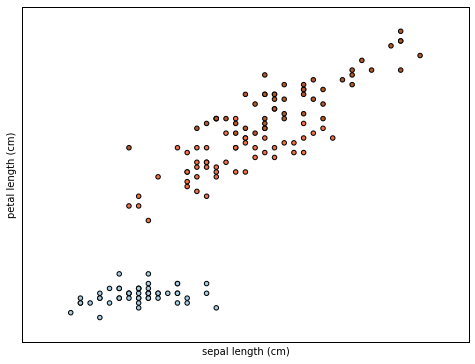

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline 

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print iris.keys()
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In this assignment, we would like to predict the length of petal by using the length of sepal. In this case, the "sepal length" is the input value and the "petal length" is the target value. In order to apply the Machine Learning algotirthm in the h2o, first we need to import the H2o library and initialization the H2o flow. See the installation document, if the "h2o" is not installed in Python.

In [5]:
import h2o
#Use help to get the details of the using function
help(h2o.init)

Help on function init in module h2o.h2o:

init(url=None, ip=None, port=None, https=None, insecure=False, username=None, password=None, cluster_name=None, proxy=None, start_h2o=True, nthreads=-1, ice_root=None, enable_assertions=True, max_mem_size=None, min_mem_size=None, strict_version_check=True, **kwargs)
    Attempt to connect to a local server, or if not successful start a new server and connect to it.
    
    :param url:
    :param ip:
    :param port:
    :param https:
    :param insecure:
    :param username:
    :param password:
    :param cluster_name:
    :param proxy:
    :param start_h2o:
    :param nthreads:
    :param ice_root:
    :param enable_assertions:
    :param max_mem_size:
    :param min_mem_size:
    :param strict_version_check:
    :param kwargs: (all other deprecated attributes)
    :returns: nothing



In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


If everything works, an H2o instance will be lanunch at http://localhost:54321. By taping this adress in your web browser, we can observe that the H2o Web UI is in place. We can directly develop the ML algorithm by using the Web UI. But for this assignment, we use the H2o's API for python.
![title](./h2o_flow.png)

This demo is provided by H2o, you can also entre "h2o.demo("glm")" to run this demo in your console. The demo is for a classification problem, but the principale remains the same. 

In [14]:
# Upload the prostate dataset
prostate =  h2o.import_file(path="https://h2o-public-test-data.s3.amazonaws.com/smalldata/logreg/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [15]:
# Print a description of the prostate data
prostate.summary()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [16]:
# Randomly split the dataset into ~70/30, training/test sets
r = prostate[0].runif()
train = prostate[r < 0.70]
test = prostate[r >= 0.70]

In [17]:
# Convert the response columns to factors (for binary classification problems)
train["CAPSULE"] = train["CAPSULE"].asfactor()
test["CAPSULE"] = test["CAPSULE"].asfactor()


In [18]:
# Build a (classification) GLM
from h2o.estimators import H2OGeneralizedLinearEstimator
prostate_glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=[0.5])
prostate_glm.train(x=["AGE", "RACE", "PSA", "VOL", "GLEASON"],y="CAPSULE", training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [19]:
# Show the model
prostate_glm.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1473776316012_5
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.381E-4 )",5,5,4,py_4_sid_9456




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.17960116283
RMSE: 0.42379377394
LogLoss: 0.530759222893
Null degrees of freedom: 266
Residual degrees of freedom: 261
Null deviance: 360.338902221
Residual deviance: 283.425425025
AIC: 295.425425025
AUC: 0.792860470533
Gini: 0.585720941067
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.296910509916: 


,0,1,Error,Rate
0,106.0,53.0,0.3333,(53.0/159.0)
1,21.0,87.0,0.1944,(21.0/108.0)
Total,127.0,140.0,0.2772,(74.0/267.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2969105,0.7016129,138.0
max f2,0.2244281,0.8072100,204.0
max f0point5,0.5179445,0.6762295,93.0
max accuracy,0.5179445,0.7340824,93.0
max precision,0.9967267,1.0,0.0
max recall,0.1076114,1.0,243.0
max specificity,0.9967267,1.0,0.0
max absolute_mcc,0.2969105,0.4640780,138.0
max min_per_class_accuracy,0.3883907,0.7222222,117.0
max mean_per_class_accuracy,0.2969105,0.7361111,138.0


Gains/Lift Table: Avg response rate: 40.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112360,0.9645704,2.4722222,2.4722222,1.0,1.0,0.0277778,0.0277778,147.2222222,147.2222222
,2,0.0224719,0.9522347,2.4722222,2.4722222,1.0,1.0,0.0277778,0.0555556,147.2222222,147.2222222
,3,0.0299625,0.9441000,2.4722222,2.4722222,1.0,1.0,0.0185185,0.0740741,147.2222222,147.2222222
,4,0.0411985,0.9296140,2.4722222,2.4722222,1.0,1.0,0.0277778,0.1018519,147.2222222,147.2222222
,5,0.0524345,0.9159345,2.4722222,2.4722222,1.0,1.0,0.0277778,0.1296296,147.2222222,147.2222222
,6,0.1011236,0.7627942,1.9017094,2.1975309,0.7692308,0.8888889,0.0925926,0.2222222,90.1709402,119.7530864
,7,0.1498127,0.6925134,1.5213675,1.9777778,0.6153846,0.8,0.0740741,0.2962963,52.1367521,97.7777778
,8,0.2022472,0.6179582,1.2361111,1.7854938,0.5,0.7222222,0.0648148,0.3611111,23.6111111,78.5493827
,9,0.2996255,0.5489215,1.7115385,1.7614583,0.6923077,0.7125,0.1666667,0.5277778,71.1538462,76.1458333
,10,0.4007491,0.4823168,1.1903292,1.6173416,0.4814815,0.6542056,0.1203704,0.6481481,19.0329218,61.7341641



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2016-09-14 14:12:45,0.000 sec,0,180.1694511,0.6747920
,2016-09-14 14:12:45,0.122 sec,1,145.1127643,0.5438926
,2016-09-14 14:12:45,0.148 sec,2,141.8303323,0.5318080
,2016-09-14 14:12:45,0.199 sec,3,141.7134799,0.5314234
,2016-09-14 14:12:46,0.256 sec,4,141.7127125,0.5314228


In [20]:
# Predict on the test set and show the first ten predictions
predictions = prostate_glm.predict(test)
predictions.show()


glm prediction progress: |████████████████████████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.495215,0.504785
0,0.730431,0.269569
1,0.551276,0.448724
0,0.72343,0.27657
1,0.398458,0.601542
0,0.889811,0.110189
0,0.960382,0.0396179
1,0.49595,0.50405
1,0.248057,0.751943
1,0.43444,0.56556


In [21]:
# Show default performance metrics
performance = prostate_glm.model_performance(test)
performance.show()


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.179417281391
RMSE: 0.423576771543
LogLoss: 0.52709358672
Null degrees of freedom: 112
Residual degrees of freedom: 107
Null deviance: 151.955414855
Residual deviance: 119.123150599
AIC: 131.123150599
AUC: 0.793790849673
Gini: 0.587581699346
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.304270781192: 


,0,1,Error,Rate
0,44.0,24.0,0.3529,(24.0/68.0)
1,9.0,36.0,0.2,(9.0/45.0)
Total,53.0,60.0,0.292,(33.0/113.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3042708,0.6857143,59.0
max f2,0.1246993,0.8093525,97.0
max f0point5,0.5655605,0.7453416,28.0
max accuracy,0.5655605,0.7699115,28.0
max precision,0.9840998,1.0,0.0
max recall,0.1246993,1.0,97.0
max specificity,0.9840998,1.0,0.0
max absolute_mcc,0.5655605,0.5153411,28.0
max min_per_class_accuracy,0.4668071,0.6888889,51.0
max mean_per_class_accuracy,0.5655605,0.7299020,28.0


Gains/Lift Table: Avg response rate: 39.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0176991,0.9712175,2.5111111,2.5111111,1.0,1.0,0.0444444,0.0444444,151.1111111,151.1111111
,2,0.0265487,0.9543722,2.5111111,2.5111111,1.0,1.0,0.0222222,0.0666667,151.1111111,151.1111111
,3,0.0353982,0.9289485,2.5111111,2.5111111,1.0,1.0,0.0222222,0.0888889,151.1111111,151.1111111
,4,0.0442478,0.9235636,2.5111111,2.5111111,1.0,1.0,0.0222222,0.1111111,151.1111111,151.1111111
,5,0.0530973,0.9193106,2.5111111,2.5111111,1.0,1.0,0.0222222,0.1333333,151.1111111,151.1111111
,6,0.1061947,0.8169395,2.5111111,2.5111111,1.0,1.0,0.1333333,0.2666667,151.1111111,151.1111111
,7,0.1504425,0.6544068,1.0044444,2.0679739,0.4,0.8235294,0.0444444,0.3111111,0.4444444,106.7973856
,8,0.2035398,0.5992996,2.0925926,2.0743961,0.8333333,0.8260870,0.1111111,0.4222222,109.2592593,107.4396135
,9,0.3008850,0.5217981,1.3696970,1.8464052,0.5454545,0.7352941,0.1333333,0.5555556,36.9696970,84.6405229
,10,0.3982301,0.5039021,0.9131313,1.6182716,0.3636364,0.6444444,0.0888889,0.6444444,-8.6868687,61.8271605


Question 1
------------
Please convert your demo for the iris data set. We note that our problem is a regression problem. 
Using help() to give a more details of the H2OGeneralizedLinearEstimator function.

In [27]:
help(H2OGeneralizedLinearEstimator)

Help on class H2OGeneralizedLinearEstimator in module h2o.estimators.glm:

class H2OGeneralizedLinearEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Generalized Linear Modeling
 |  
 |  Fits a generalized linear model, specified by a response variable, a set of predictors, and a
 |  description of the error distribution.
 |  
 |  Parameters
 |  ----------
 |    model_id : str
 |      Destination id for this model; auto-generated if not specified.
 |  
 |    training_frame : str
 |      Id of the training data frame (Not required, to allow initial validation of model parameters).
 |  
 |    validation_frame : str
 |      Id of the validation data frame.
 |  
 |    nfolds : int
 |      Number of folds for N-fold cross-validation (0 to disable or >= 2).
 |      Default: 0
 |  
 |    seed : int
 |      Seed for pseudo random number generator (if applicable)
 |      Default: -1
 |  
 |    keep_cross_validation_predictions : bool
 |      Whether to keep the predictions of the cross